In [24]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [25]:
df = pd.read_csv(r"C:\Users\deepu\Downloads\archive (1) (1).zip")


In [26]:

print("Dataset Shape:", df.shape)
print("\nData Types and Null Values:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())


Dataset Shape: (1000, 11)

Data Types and Null Values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Resume_ID               1000 non-null   int64 
 1   Name                    1000 non-null   object
 2   Skills                  1000 non-null   object
 3   Experience (Years)      1000 non-null   int64 
 4   Education               1000 non-null   object
 5   Certifications          726 non-null    object
 6   Job Role                1000 non-null   object
 7   Recruiter Decision      1000 non-null   object
 8   Salary Expectation ($)  1000 non-null   int64 
 9   Projects Count          1000 non-null   int64 
 10  AI Score (0-100)        1000 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None

Missing Values:
 Resume_ID                   0
Name                        0
Skills                      0

In [27]:

df = df.drop_duplicates()
df['Certifications'].fillna("None", inplace=True)
print("\nMissing Values after cleaning:\n", df.isnull().sum())



Missing Values after cleaning:
 Resume_ID                 0
Name                      0
Skills                    0
Experience (Years)        0
Education                 0
Certifications            0
Job Role                  0
Recruiter Decision        0
Salary Expectation ($)    0
Projects Count            0
AI Score (0-100)          0
dtype: int64


In [28]:

target_col = 'Job Role'
le = LabelEncoder()
df[target_col] = le.fit_transform(df[target_col])
categorical_cols = ['Skills', 'Education', 'Certifications', 'Recruiter Decision']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,226,10,0,3,0,0,104895,8,100
1,2,Wesley Roman,32,10,3,2,2,0,113002,1,100
2,3,Corey Sanchez,46,1,3,1,1,0,71766,7,70
3,4,Elizabeth Carney,152,7,1,0,0,0,46848,0,95
4,5,Julie Hill,221,4,4,3,3,0,87441,9,100


In [29]:

num_cols = ['Experience (Years)', 'Salary Expectation ($)', 'Projects Count', 'AI Score (0-100)']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

df.head()


,Resume_ID,Name,Skills,Experience (Years),Education,Certifications,Job Role,Recruiter Decision,Salary Expectation ($),Projects Count,AI Score (0-100)
0,1,Ashley Ali,226,1.640557,0,3,0,0,1.080895,0.887684,0.765286
1,2,Wesley Roman,32,1.640557,3,2,2,0,1.432808,-1.279664,0.765286
2,3,Corey Sanchez,46,-1.252275,3,1,1,0,-0.357187,0.578063,-0.665155
3,4,Elizabeth Carney,152,0.676280,1,0,0,0,-1.438840,-1.589285,0.526879
4,5,Julie Hill,221,-0.287997,4,3,3,0,0.323242,1.197305,0.765286


In [30]:

X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)


Training Set Shape: (800, 10)
Testing Set Shape: (200, 10)


In [31]:
print("Data preprocessing, transformation, and structuring completed successfully!")


Data preprocessing, transformation, and structuring completed successfully!


In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


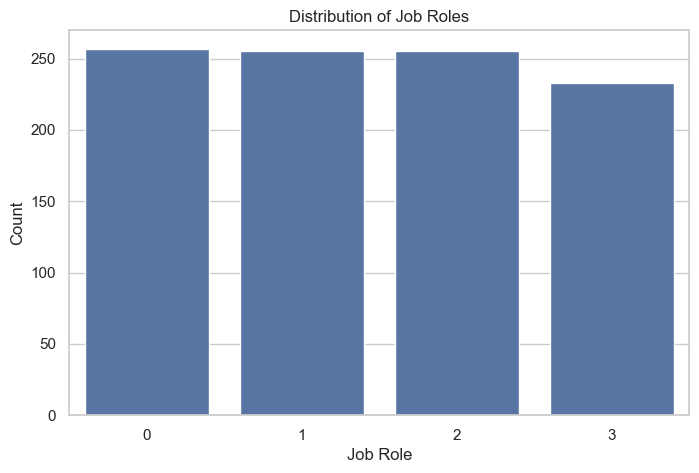

In [33]:

plt.figure(figsize=(8,5))
sns.countplot(x='Job Role', data=df)
plt.title('Distribution of Job Roles')
plt.xlabel('Job Role')
plt.ylabel('Count')
plt.show()


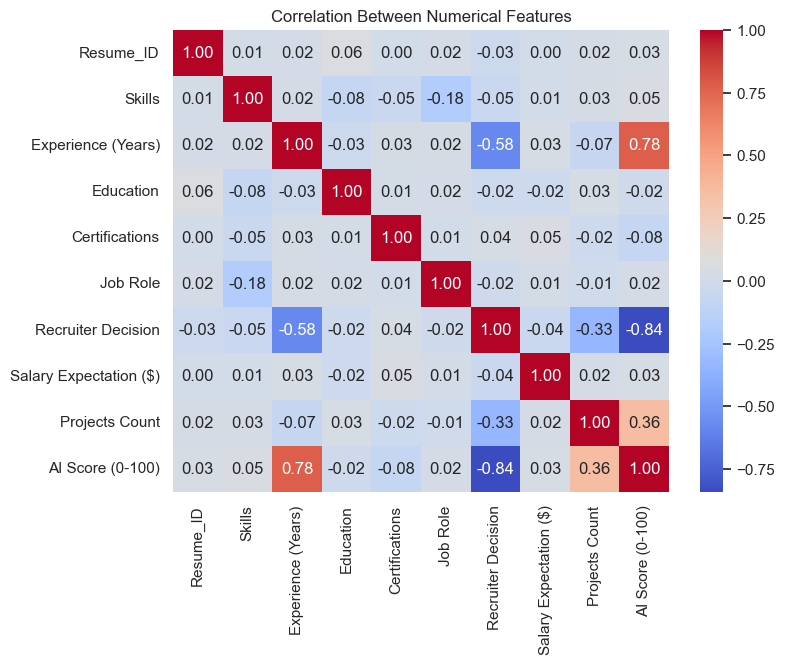

In [34]:

numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Numerical Features')
plt.show()


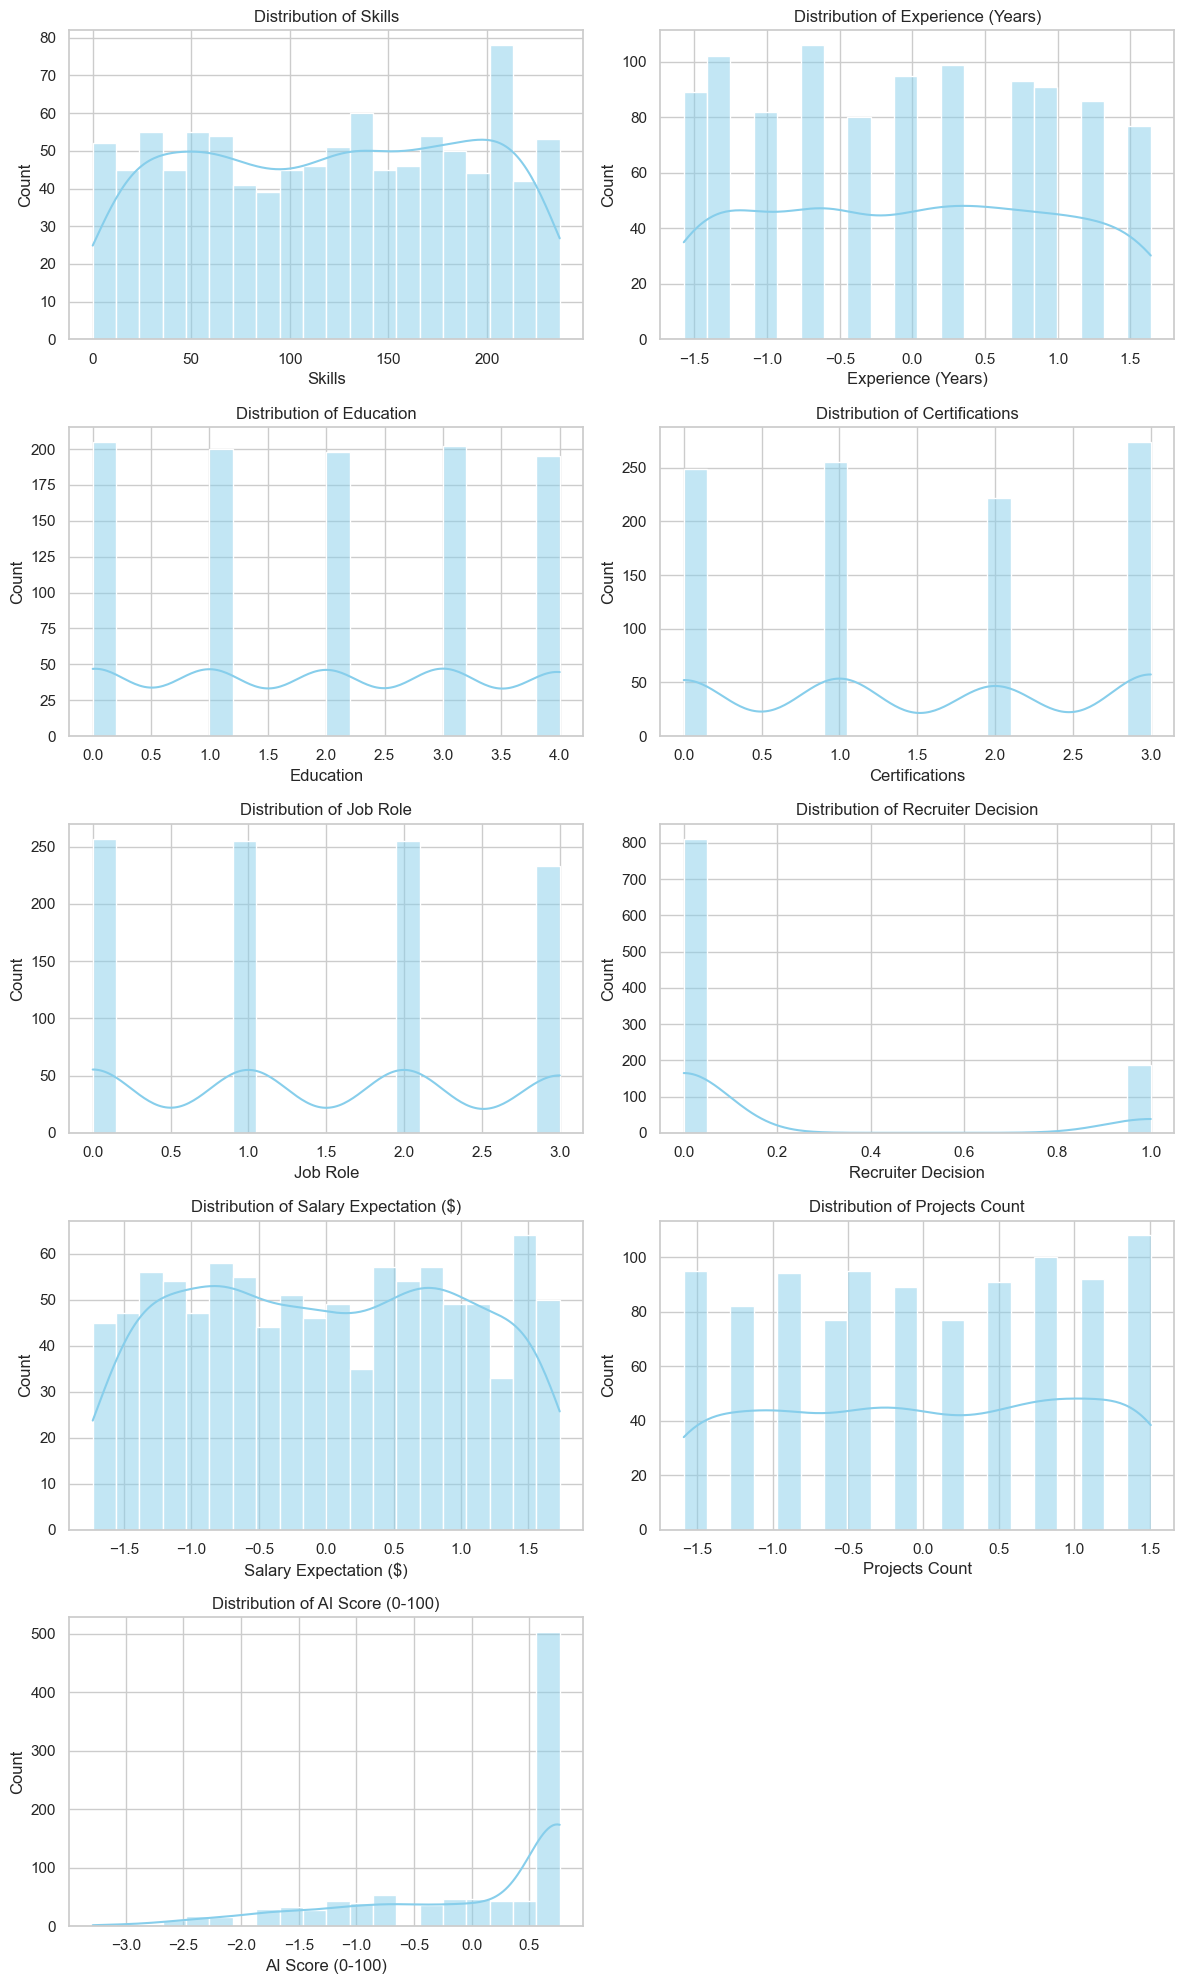

In [35]:
num_cols = numeric_df.columns.drop('Resume_ID')
n = len(num_cols)

rows = (n + 1) // 2  # number of rows
plt.figure(figsize=(12, 4*rows))

for i, col in enumerate(num_cols, 1):
    plt.subplot(rows, 2, i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
